<a href="https://colab.research.google.com/github/PradipKumarChaudhary1/Hand-Written-Digit-Recognition/blob/master/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

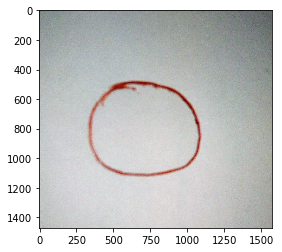

In [0]:
#preprocessing

import cv2
import matplotlib.pyplot as plt
#path= drive/My Drive/project/project_images/Digit/.JPG
images=cv2.imread("drive/My Drive/project/project_images/Digit/0.JPG")
plt.imshow(images,cmap="gray")
plt.show()

In [0]:
#Data prepration from images in form of list


import os
import cv2
import random 
import pickle
import numpy as np

#directory where our data have put
data_dir="drive/My Drive/project/project_images/Digit"
#training data's folders
image_data=["zero","one","two","three","four","five","six","seven","eight","nine"]
#image size in worst case
image_size=50
#this variable are use to store feture and corresponding label
training_data=[]
#every folder from data set as zero,one....
for folder in image_data:
  #making path with directory and folder
  path=os.path.join(data_dir,folder)
  #index_value use to defining which images belongs which class
  index_value=image_data.index(folder)
  #path of every image
  for photo in os.listdir(path):
    #reading images 
    image=cv2.imread(os.path.join(path,photo),cv2.IMREAD_GRAYSCALE)
    #resize the image
    new_image=cv2.resize(image,(image_size,image_size))
    training_data.append([new_image,index_value])

#use for randomisation of data
random.shuffle(training_data)
feature=[]
label=[]
#extrating feature and label
for x,y in training_data:
  feature.append(x)
  label.append(y)
  
feature=np.array(feature).reshape(-1,image_size,image_size,1)
#creating file and dump feature
pointer=open("drive/My Drive/project/digit_feature","wb")
pickle.dump(feature,pointer)
pointer.close()

#creating file and dump label
pointer=open("drive/My Drive/project/digit_label","wb")
pickle.dump(label,pointer)
pointer.close()

In [0]:
#traing model


import pickle
from keras.utils import to_categorical

#reading feature
pointer=open("drive/My Drive/project/digit_feature","rb")
x=pickle.load(pointer)
x=x/255.0  #use to keras model 
pointer.close()
#reading label
pointer=open("drive/My Drive/project/digit_label","rb")
y=pickle.load(pointer)
y = to_categorical(y)  #use for keras model because it takes label in this formate(no. of test case,y) 
pointer.close()

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense,Activation,Flatten,Dropout

model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu', input_shape=x.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x,y,batch_size=32,epochs=12,validation_split=0.1)
model.save("drive/My Drive/project/Pk_digit.model")

In [0]:
import cv2
import keras
import numpy as np

categories=["zero","one","two","three","four","five","six","seven","eight","nine"]

def prepare_image(image_path):
  image_size=50
  image=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
  image_array=cv2.resize(image,(image_size,image_size))
  image_array=image_array.reshape(-1,image_size,image_size,1)
  return image_array
#loading model which one is saved
model=keras.models.load_model("drive/My Drive/project/Pk_digit.model")

In [0]:
prediction=model.predict([prepare_image("drive/My Drive/project/project_images/Digit/1.JPG")])
index=np.where(prediction[0]==1.0)[0][0]
print(categories[index])

one
